In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'NanumGothicCoding'
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns
%matplotlib inline

In [2]:
# 최소 제곱법으로 기울기와 y절편을 계산할 데이터를 만든다.
x = [ 2,  4,  6,  8] # 공부한 시간
y = [81, 93, 91, 97] # 시험 점수

In [3]:
# 공부한 시간과 시험 점수 데이터를 판다스 데이터프레임으로 만든다.
df = pd.DataFrame(columns=['x', 'y']) # 빈 데이터프레임이 생성된다.
# 빈 데이터프레임에 데이터를 넣어줄 때는 loc[index]를 사용해서 리스트 형태의 데이터를 넣어주면 된다.
df.loc[0] = [2, 81]
df.loc[1] = [4, 93]
df.loc[2] = [6, 91]
df.loc[3] = [8, 97]
df

,x,y
0,2,81
1,4,93
2,6,91
3,8,97


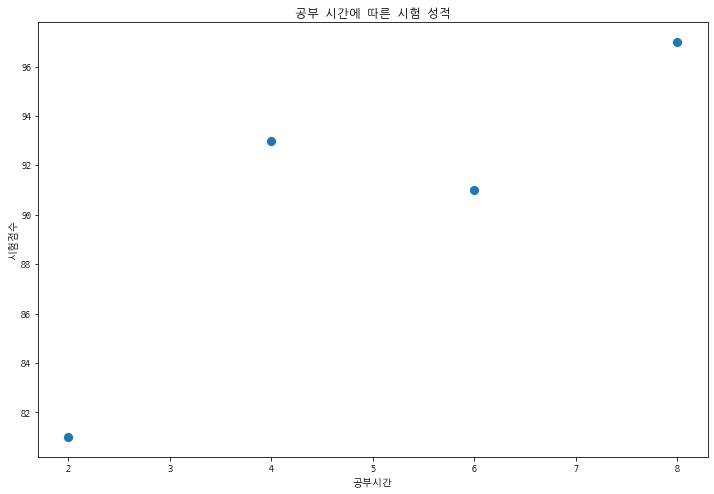

In [4]:
# 공부한 시간과 시험 점수 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='x', y='y', s=100)
plt.title('공부 시간에 따른 시험 성적')
plt.xlabel('공부시간')
plt.ylabel('시험점수')
plt.show()

In [5]:
# mean() : 넘파이에서 인수로 지정된 데이터의 평균을 계산하는 메소드
mean_x = np.mean(x) # 공부 시간의 평균
mean_y = np.mean(y) # 시험 점수의 평균 => 실제값
print('공부한 시간의 평균 : {}, 시험 점수의 평균 : {}'.format(mean_x, mean_y))

공부한 시간의 평균 : 5.0, 시험 점수의 평균 : 90.5


기울기 공식 => ∑(x - x의 평균)(y - y의 평균) / ∑(x - x의 평균) ** 2

In [6]:
# 기울기 공식의 분자를 계산하는 함수
def top(x, mean_x, y, mean_y):
    total = 0.0
    for i in range(len(x)):
        total += (x[i] - mean_x) * (y[i] - mean_y)
    return total

dividend = top(x, mean_x, y, mean_y)
print(dividend)

46.0


In [7]:
# 기울기 공식의 분모를 계산하는 함수
def bottom(x, mean_x):
    total = 0.0
    for i in range(len(x)):
        total += (x[i] - mean_x) ** 2
    return total

divisor = bottom(x, mean_x)
print(divisor)

20.0


In [8]:
divisor = sum([(i - mean_x) ** 2 for i in x])
print(divisor)

20.0


기울기와 y절편을 계산한다.  
y절편 공식 => y의 평균 - (x의 평균 * 기울기)

In [9]:
print('기울기의 분자 : {}, 기울기의 분모 : {}'.format(dividend, divisor))
a = dividend / divisor # 기울기
b = mean_y - (mean_x * a) # y절편
print('기울기 : {}, y절편 : {}'.format(a, b))

기울기의 분자 : 46.0, 기울기의 분모 : 20.0
기울기 : 2.3, y절편 : 79.0
